# Import

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn import linear_model
from sklearn import naive_bayes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_excel("..\data\Returns_Export.xlsx")

# Exploratory Data Analysis

In [3]:
df.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
0,2021-12-14,Baby Wasserspielzeug Addmos Badespielzeug Spie...,9.99,07-08009-64134,Verkauf,0,0,9.99,265.0,23.0,B083DQH3DY,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
1,2021-05-13,Pokemon Sun & Moon Theme Deck Pack Waldschatte...,9.99,16-07049-22699,Verkauf,0,0,9.99,265.0,23.0,B01MZ6A8YO,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
2,2021-09-20,Spielpuppe Enchantimals GNP16 Schneemann Sharl...,9.99,19-07627-72302,Verkauf,0,0,9.99,265.0,23.0,B084L11FCZ,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
3,2021-04-15,Schlagzeug Colorbaby Spielzeug Kinder Musik In...,9.99,17-06905-72218,Verkauf,0,0,9.99,265.0,23.0,B07X4ZGCPQ,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
4,2021-06-14,Ravensburger tiptoi 00737 Schatzsuche in der B...,9.99,08-07202-18906,Verkauf,0,0,9.99,265.0,23.0,B00V8KE8N6,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183257 entries, 0 to 183256
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   redatum                    183257 non-null  datetime64[ns]
 1   artikelbeschreibung        183257 non-null  object        
 2   verkaufspreis              183257 non-null  float64       
 3   platformspecificorderid    183257 non-null  object        
 4   VK                         183257 non-null  object        
 5   Erstattungstyp             183243 non-null  object        
 6   Erstattungsart             183243 non-null  object        
 7   Artikelpreis inkl Versand  183257 non-null  float64       
 8   User_Id                    178475 non-null  float64       
 9   Vendor_Id                  178474 non-null  float64       
 10  Asin                       177029 non-null  object        
 11  Category                   178475 non-null  object  

In [5]:
refunds = df.loc[(df["Erstattungsart"] != 0) & (df["Erstattungsart"] != "NaN")]
all_pos = df
all_pos["Erstattungstyp"].replace(0, "Verkauf", inplace=True)

In [6]:
refunds.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
134534,2021-08-25,RockJam E-Gitarren-Set in Standardgröße E-Gita...,35.50,05-07518-23081,Verkauf,NaN,NaN,54.723077,226.0,23.0,B01M66OZ0V,MusicInstruments,226.0,Damage,Used,2.0,3.0,No,False,0.0
134535,2021-08-25,Akustikgitarre MSA Gitarre Instrument 4/4 Größ...,15.15,05-07518-23081,Verkauf,NaN,NaN,34.373077,314.0,23.0,B01N6C6PJ3,MusicInstruments,314.0,Acceptable,Used,0.0,0.0,No,False,0.0
134536,2021-08-25,E-Gitarre RockJam Gitarre Saiteninstrument Sun...,53.88,05-07518-23081,Verkauf,NaN,NaN,73.103077,314.0,23.0,B01M6ZH0AW,MusicInstruments,314.0,NonFunctional,Used,1.0,0.0,No,False,0.0
134537,2021-08-25,Akustikgitarre Gitarre Martin Smith Akustik In...,20.50,05-07518-23081,Verkauf,NaN,NaN,39.723077,314.0,23.0,B00UOUK4IE,MusicInstruments,314.0,Damage,Used,1.0,2.0,No,False,0.0
134538,2021-06-07,ReNr 441799 ReNr 439035 EGitarre Display4top R...,25.00,05-07133-60124,Verkauf,Teilerstattung (TE),Defekt,25.000000,314.0,23.0,B0863H39LF,MusicInstruments,314.0,VeryGood,Used,2.0,0.0,No,False,0.0


In [7]:
refunds.dropna(inplace=True)
all_pos.dropna(inplace=True)

In [8]:
print(refunds.shape)
print(all_pos.shape)

(18817, 20)
(177005, 20)


In [9]:
def nuniquecategory(df):
    for column in df.columns:
        print(column)
        print(df[column].nunique())
        print("")


In [10]:
nuniquecategory(all_pos)

redatum
435

artikelbeschreibung
119112

verkaufspreis
15866

platformspecificorderid
129282

VK
3

Erstattungstyp
5

Erstattungsart
7

Artikelpreis inkl Versand
28403

User_Id
133

Vendor_Id
9

Asin
47453

Category
63

client_condition_user_id
134

Condition
8

Item_State
2

Accessory_Complete
3

OVP
5

Repaired
5

Case_Swap
1

Seal_Sticker_Damaged
2



In [11]:
def eda(df):
    df_corr = df[["Erstattungstyp", "verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]


    df_corr = df_corr[df_corr["Erstattungstyp"] != "Ersatz"]

   # labels = df_corr["Erstattungstyp"].unique()

   # labels = labels[labels != "Verkauf"]

   # df_corr["Erstattungstyp"] = df_corr["Erstattungstyp"].replace(labels, "Erstattung")
    df_corr = df_corr.reset_index(drop=True)

    label_encoder_category = preprocessing.LabelEncoder()
    df_corr["Category"] = label_encoder_category.fit_transform(df_corr["Category"])

    label_encoder_condition = preprocessing.LabelEncoder()
    df_corr["Condition"] = label_encoder_condition.fit_transform(df_corr["Condition"])

    label_encoder_state = preprocessing.LabelEncoder()
    df_corr["Item_State"] = label_encoder_state.fit_transform(df_corr["Item_State"])

    label_encoder_repaird = preprocessing.LabelEncoder()
    df_corr["Repaired"] = label_encoder_repaird.fit_transform(df_corr["Repaired"])

    label_encoder_y = preprocessing.LabelEncoder()
    df_corr["Erstattungstyp"] = label_encoder_y.fit_transform(df_corr["Erstattungstyp"])

    df_corr["verkaufspreis"] = np.sqrt(df_corr["verkaufspreis"]**2)
    print(df_corr["Erstattungstyp"].dtype)
    corrMatrix = df_corr.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    sn.set(font_scale=2)
    sn.heatmap(corrMatrix, annot=True)
    #ax.figure.axes[-1].yaxis.label.set_size(80)
    plt.show()

    for column in df_corr.columns:
        print("Plotting " + str(column))
        fig, ax = plt.subplots(figsize=(10, 10))
        box = sn.boxplot(y=column, data=df_corr, showfliers = False, color="#00998A")
        box.set(xlabel=None , ylabel=None)
        plt.show()

        df_corr.hist(figsize=(10, 5), column=column, bins=50, xlabelsize=20, ylabelsize=20, legend=False, color="#00998A")
        plt.title("")
        plt.show()

int32


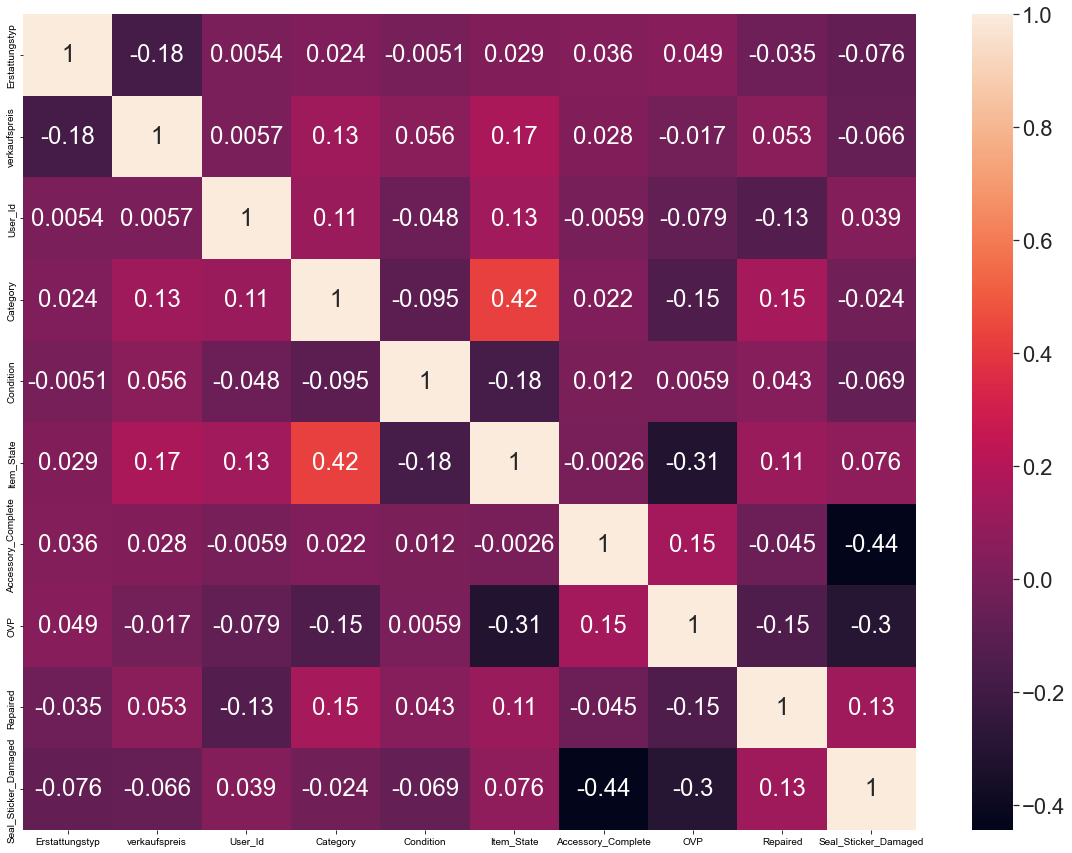

Plotting Erstattungstyp


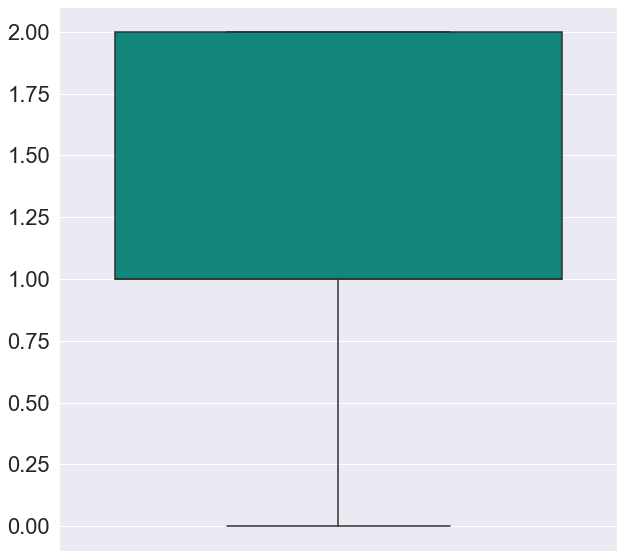

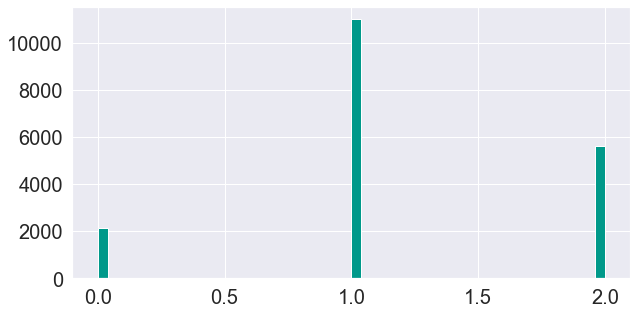

Plotting verkaufspreis


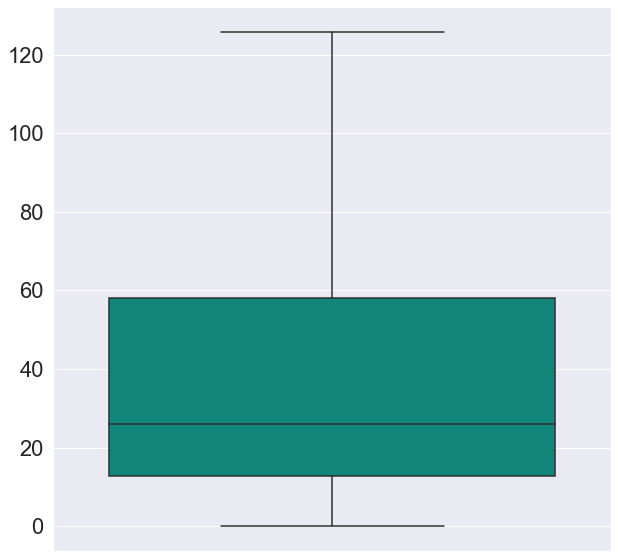

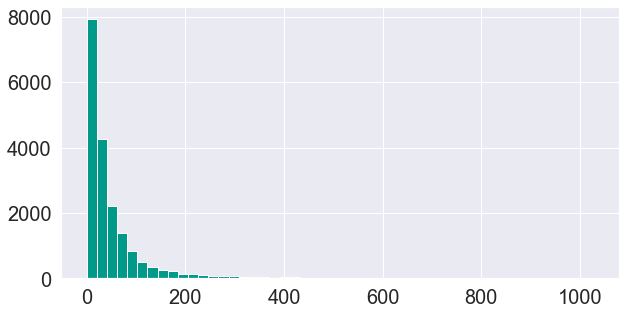

Plotting User_Id


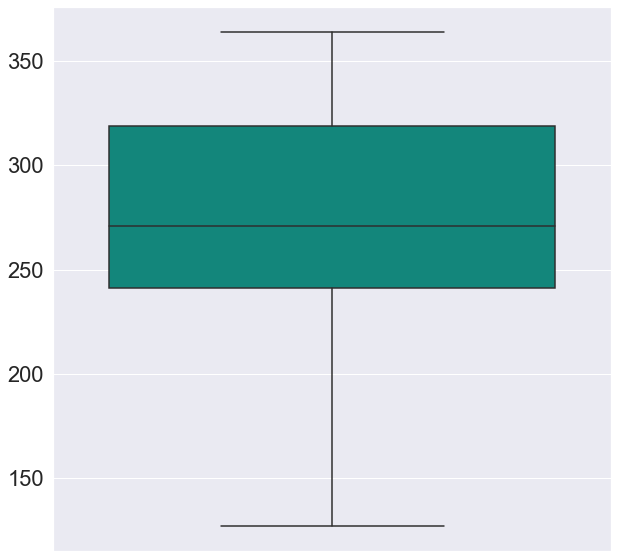

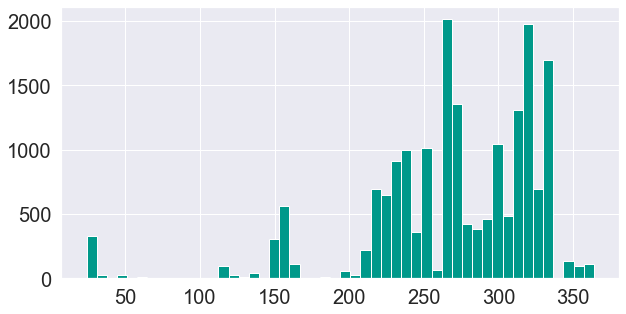

Plotting Category


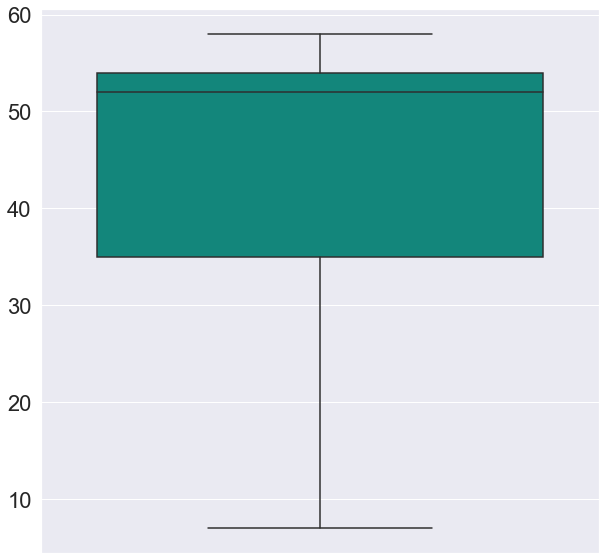

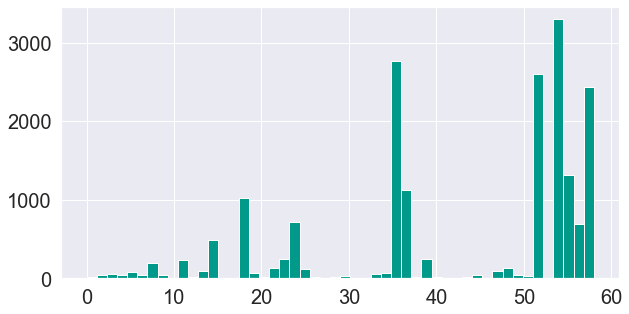

Plotting Condition


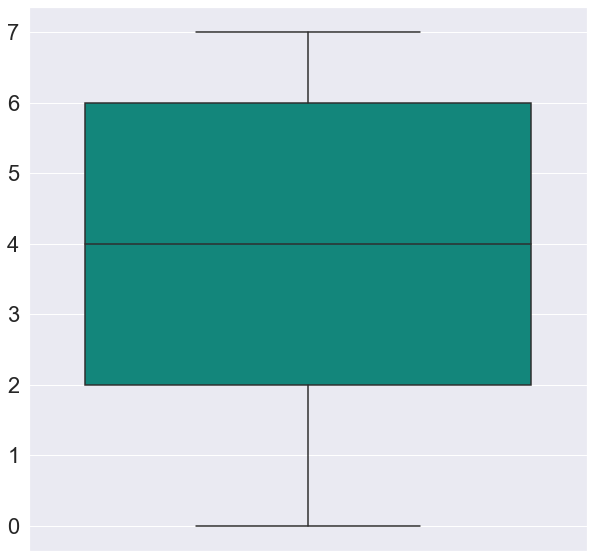

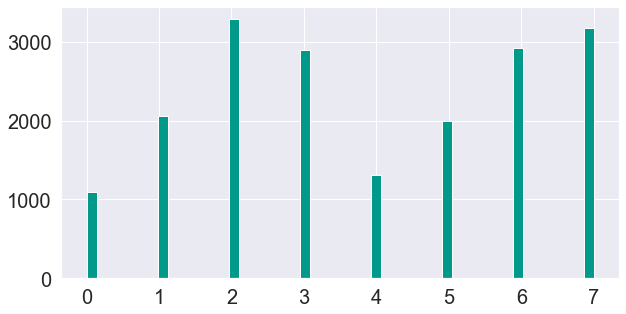

Plotting Item_State


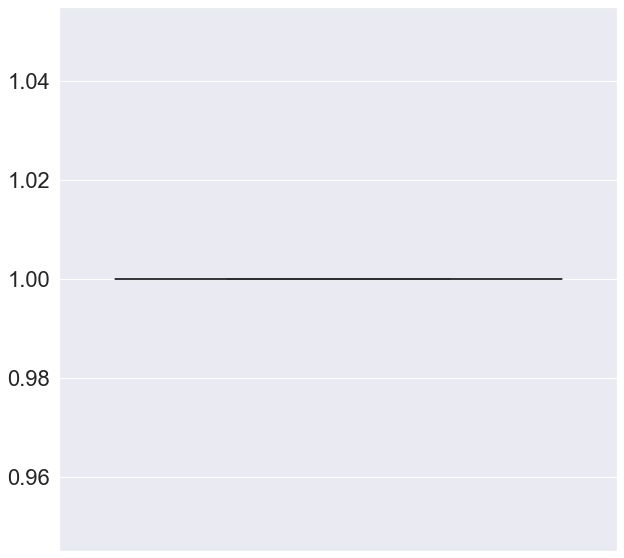

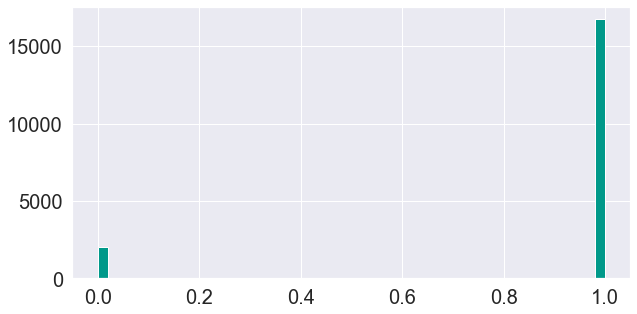

Plotting Accessory_Complete


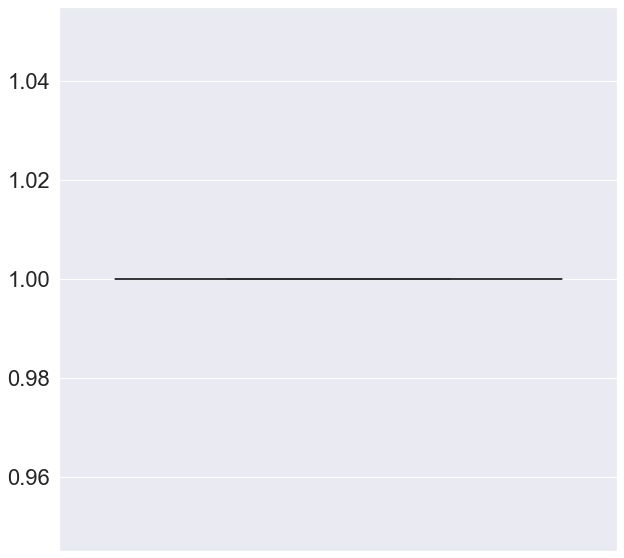

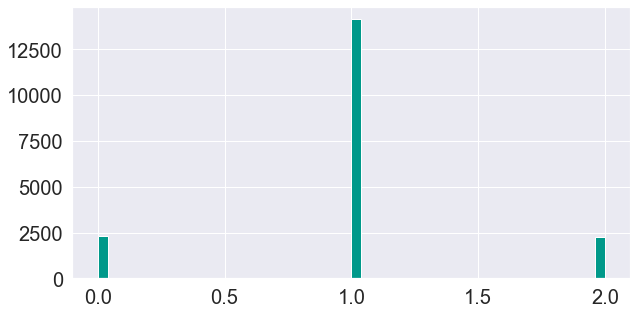

Plotting OVP


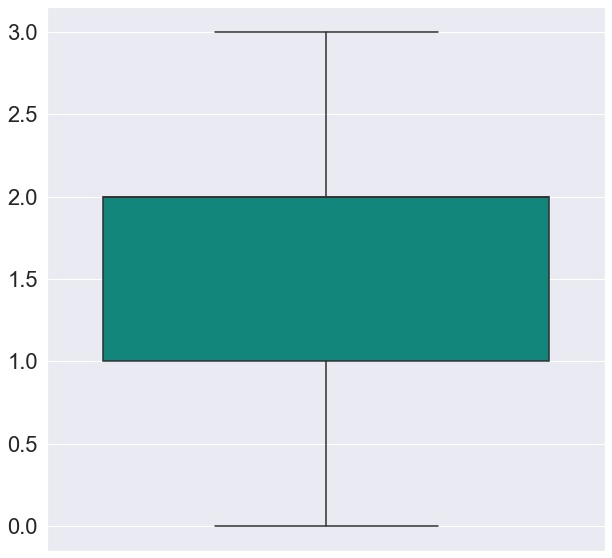

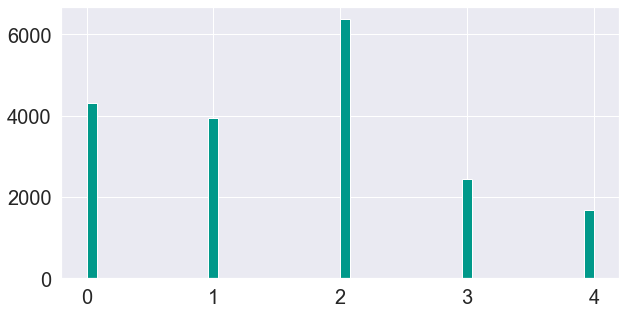

Plotting Repaired


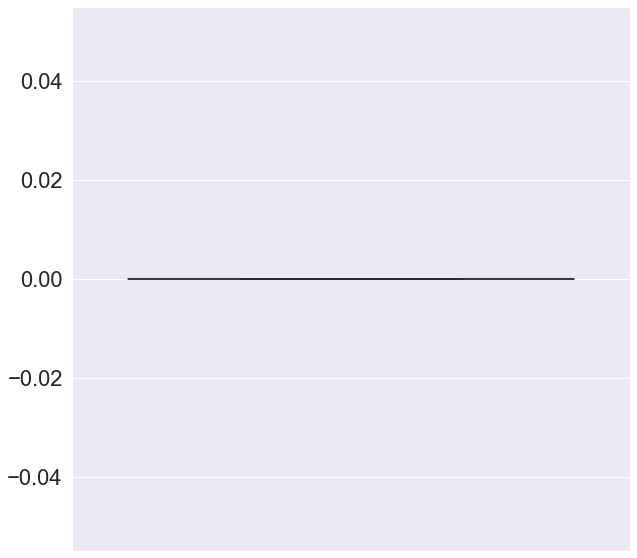

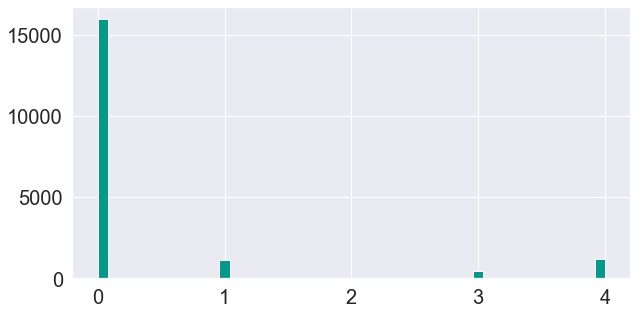

Plotting Seal_Sticker_Damaged


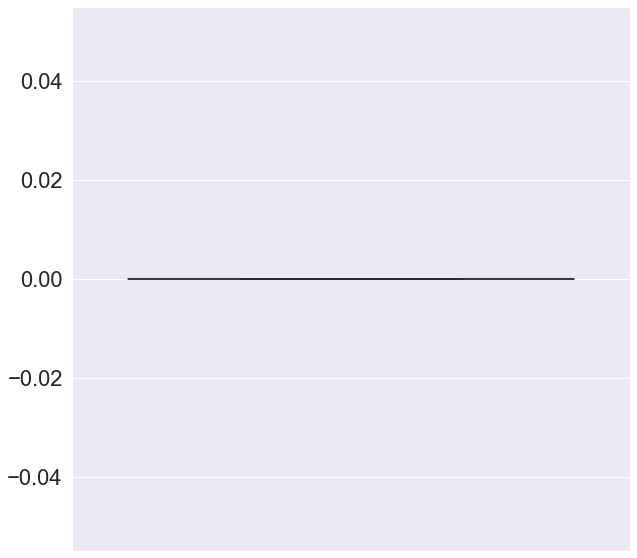

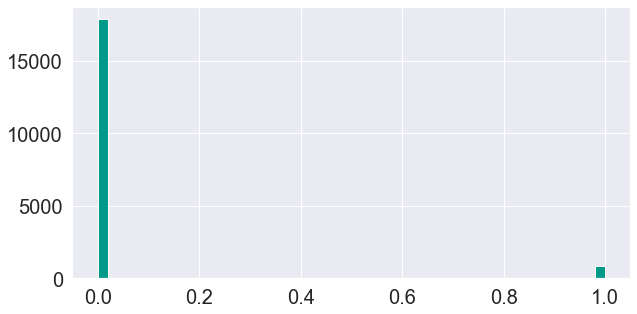

In [12]:
eda(refunds)

int32


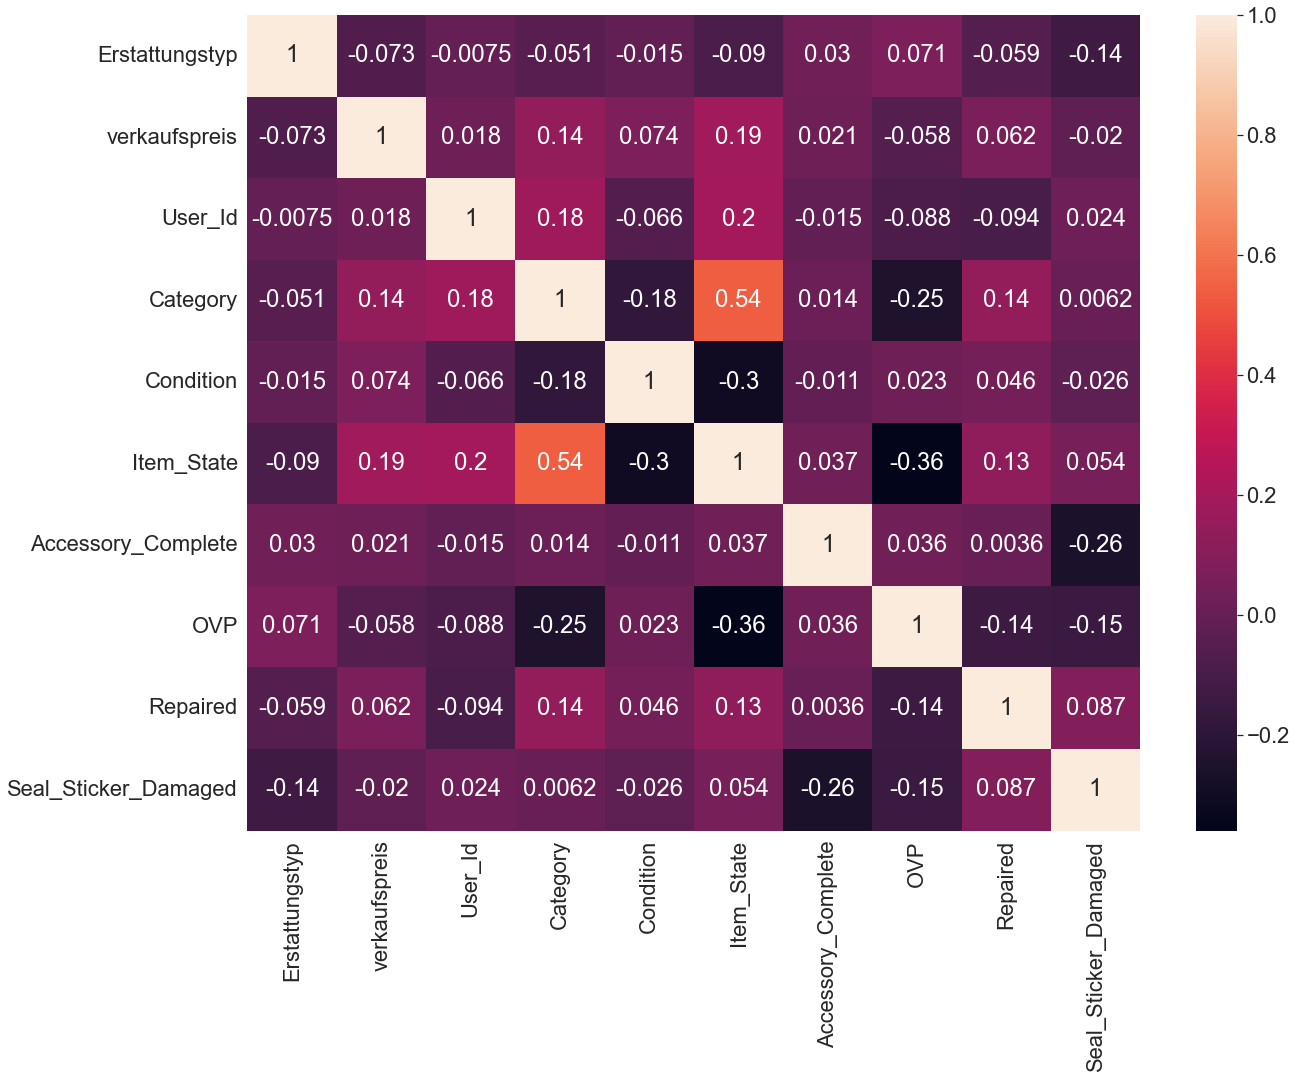

Plotting Erstattungstyp


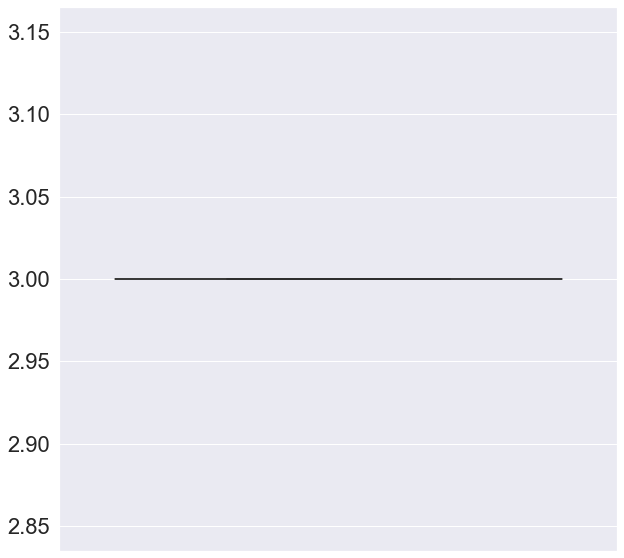

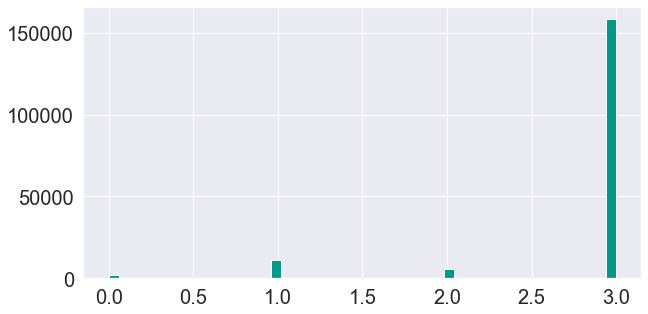

Plotting verkaufspreis


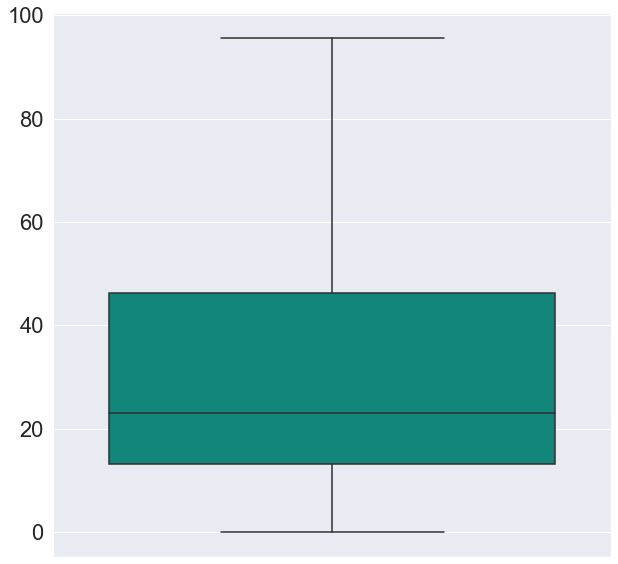

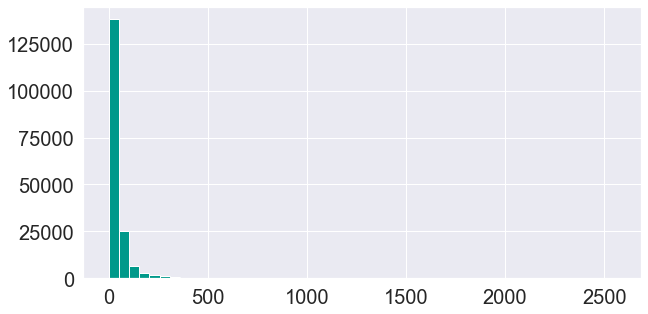

Plotting User_Id


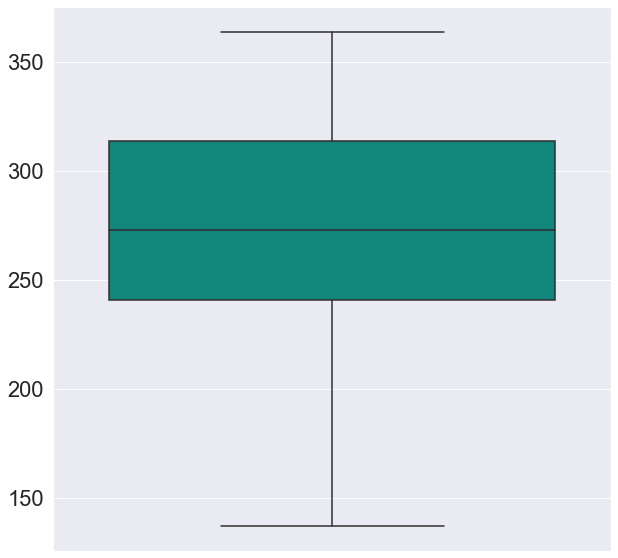

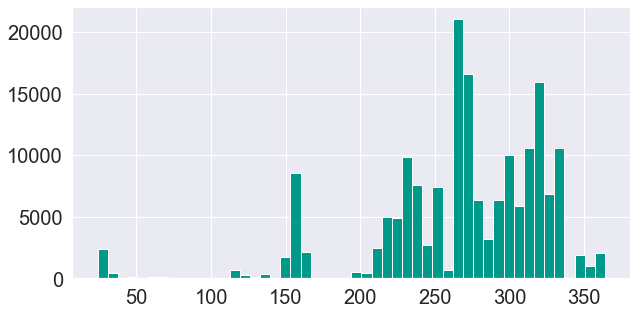

Plotting Category


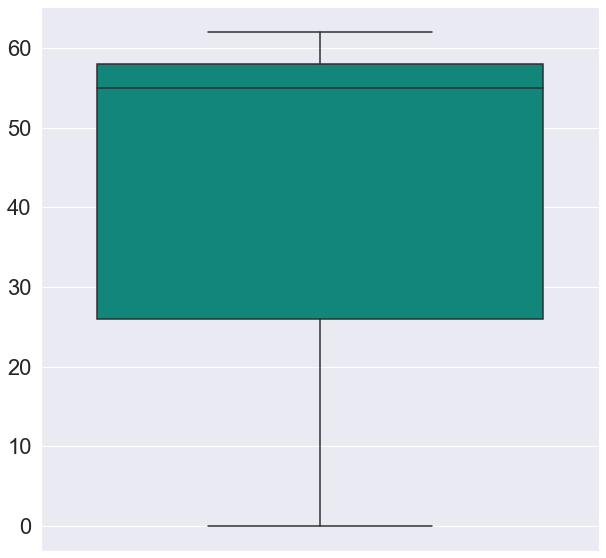

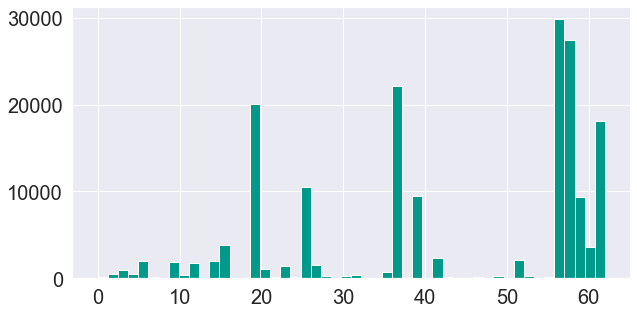

Plotting Condition


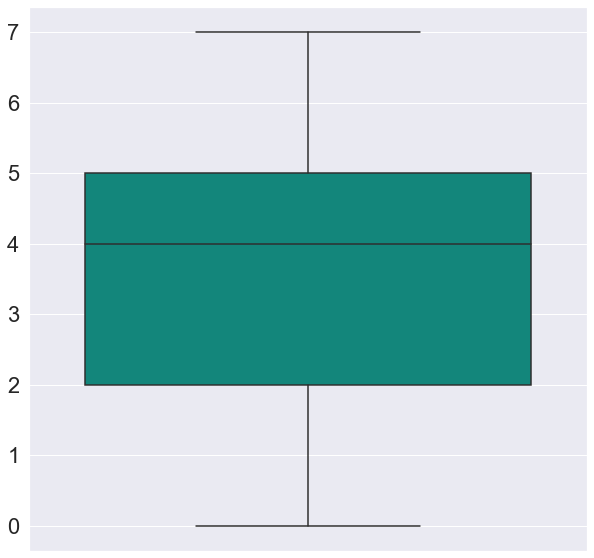

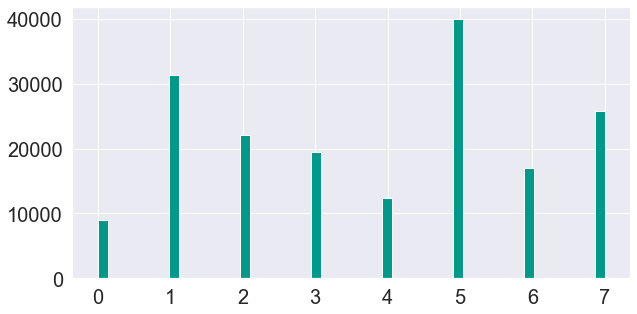

Plotting Item_State


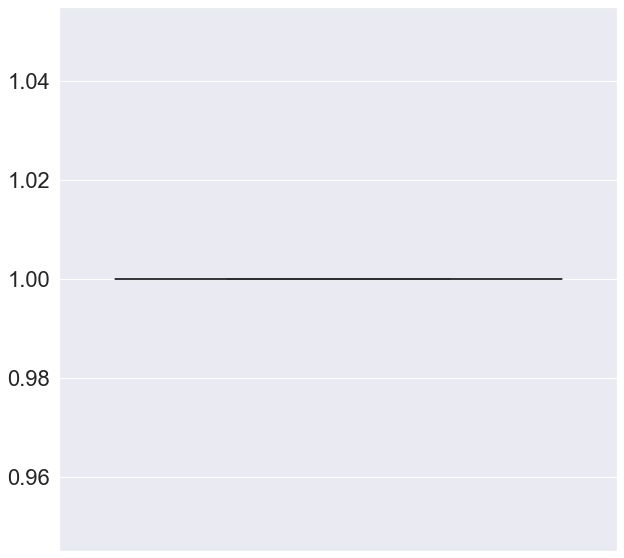

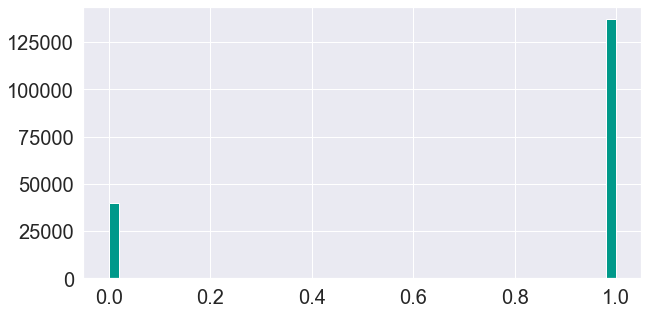

Plotting Accessory_Complete


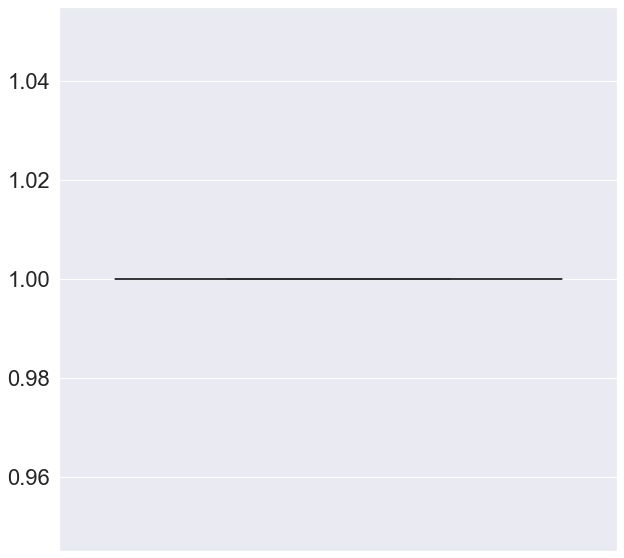

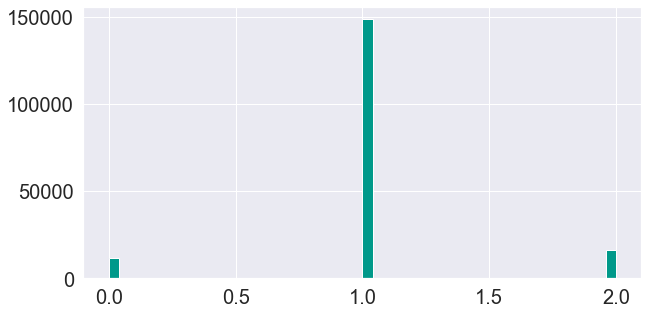

Plotting OVP


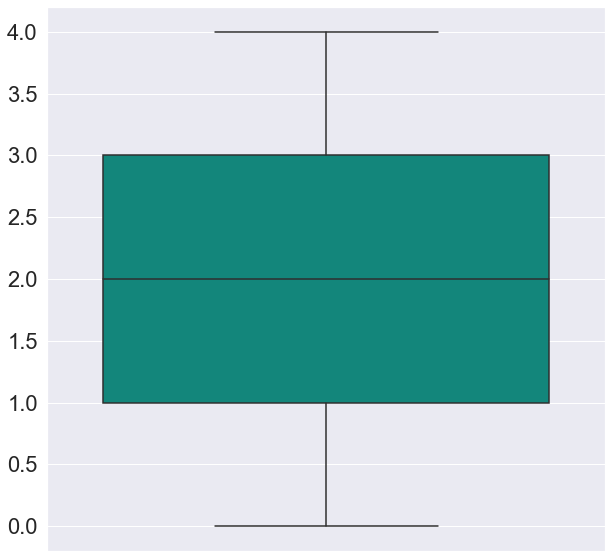

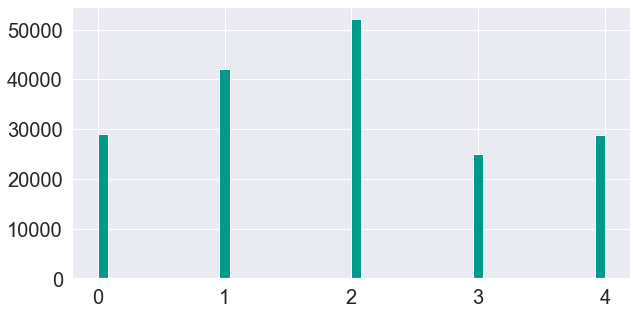

Plotting Repaired


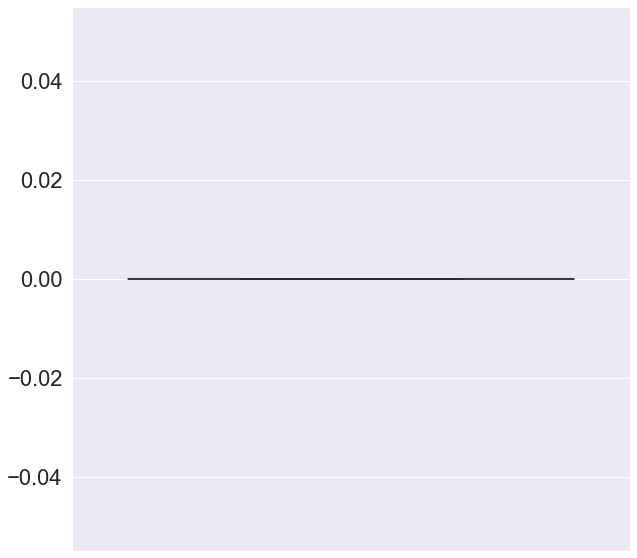

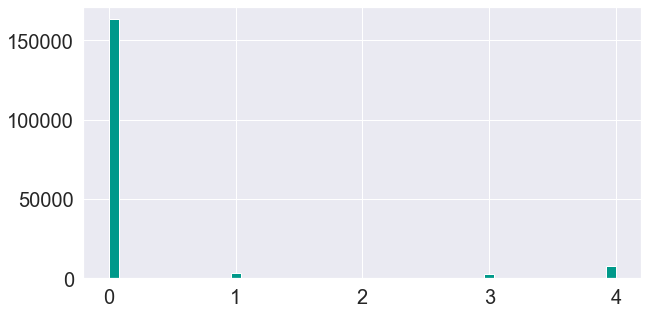

Plotting Seal_Sticker_Damaged


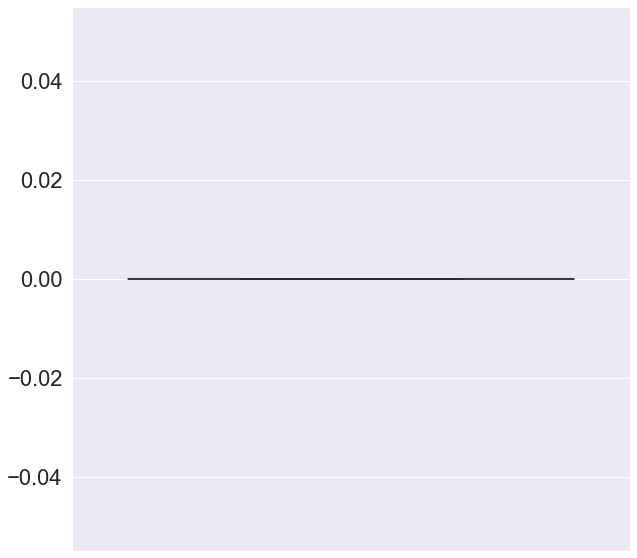

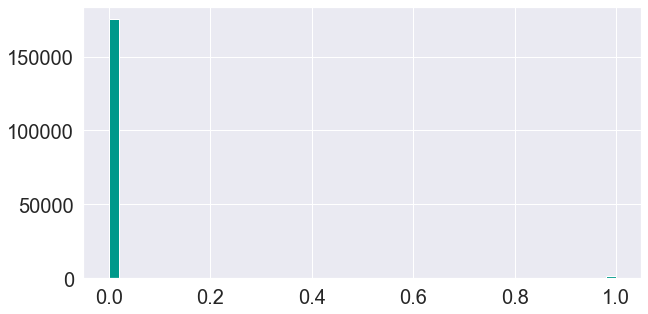

In [13]:
eda(all_pos)

# Preprocessing

In [14]:


# Drop values with Erstattungstyp = "Ersatz"
all_pos = all_pos[all_pos["Erstattungstyp"] != "Ersatz"]
refunds = refunds[refunds["Erstattungstyp"] != "Ersatz"]
# Replace the values which are not Verkauf with Erstattung
labels = all_pos["Erstattungstyp"].unique()
# Drop Verkauf from labels
labels = labels[labels != "Verkauf"]
# Replace values in y with labels
all_pos["Erstattungstyp"] = all_pos["Erstattungstyp"].replace(labels, "Erstattung")
all_pos = all_pos.reset_index(drop=True)

refunds["Erstattungstyp"] = refunds["Erstattungstyp"].replace(labels, "Erstattung")
refunds = refunds.reset_index(drop=True)

X = refunds[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
y = refunds["Erstattungstyp"]

X_all = all_pos[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
y_all = all_pos["Erstattungstyp"]



# Transformation des Verkaufspreises, sodass immer positive Werte angezeigt werden
X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)
X_all["verkaufspreis"] = np.sqrt(X_all["verkaufspreis"]**2)

In [15]:
label_encoder_category = preprocessing.LabelEncoder()
X["Category"] = label_encoder_category.fit_transform(X["Category"])

label_encoder_condition = preprocessing.LabelEncoder()
X["Condition"] = label_encoder_category.fit_transform(X["Condition"])

label_encoder_state = preprocessing.LabelEncoder()
X["Item_State"] = label_encoder_state.fit_transform(X["Item_State"])

label_encoder_repaired = preprocessing.LabelEncoder()
X["Repaired"] = label_encoder_repaired.fit_transform(X["Repaired"])

label_encoder_category_all = preprocessing.LabelEncoder()
X_all["Category"] = label_encoder_category_all.fit_transform(X_all["Category"])

label_encoder_condition_all  = preprocessing.LabelEncoder()
X_all["Condition"] = label_encoder_condition_all.fit_transform(X_all["Condition"])

label_encoder_state_all  = preprocessing.LabelEncoder()
X_all["Item_State"] = label_encoder_state_all.fit_transform(X_all["Item_State"])

label_encoder_repaired_all  = preprocessing.LabelEncoder()
X_all["Repaired"] = label_encoder_repaired_all.fit_transform(X_all["Repaired"])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.33, random_state=1)


# Model testing

In [17]:
def printAccuracyAndAUC(model, X_test, y_test):
    print("Numbers for " + str(model) + ":")
    print("Accuracy: ", model.score(X_test, y_test))
    print("AUC: ", metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class="ovr"))

In [18]:
def returnAccuracyAndAUC(model, X_test, y_test):
    return model.score(X_test, y_test), metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class="ovr")

In [19]:
def tuneAndTestWithTestData(model, param_grid, X_train, y_train, X_test, y_test, max_sample=False, verbose=10, n_max = 10_000):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=15, verbose=verbose)
    if max_sample:
        X_train = X_train.sample(n=n_max)
        y_train = y_train.sample(n=n_max)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.score(X_test, y_test))
    return grid_search.best_params_

In [20]:
# Standard logistic regression with fixed hyperparameters
clf_logreg = linear_model.LogisticRegression(random_state=1, max_iter=10000, solver="lbfgs", C=0.1)
clf_logreg.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_logreg, X_all_test, y_all_test)

Numbers for LogisticRegression(C=0.1, max_iter=10000, random_state=1):
Accuracy:  0.8939227844198554
AUC:  0.6232164110343732


In [ ]:
logreg_params_grid = {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], 'penalty': ['none', 'l2', 'l1', 'elasticnet'], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}
logreg_params = tuneAndTestWithTestData(linear_model.LogisticRegression(random_state=1), logreg_params_grid, X_all_train, y_all_train, X_all_test, y_all_test, max_sample=False, verbose=1)

In [21]:
# Tuned Logistic regression
clf_tuned_logreg = linear_model.LogisticRegression(C=10, random_state=1, solver='newton-cg')
clf_tuned_logreg = clf_tuned_logreg.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tuned_logreg, X_all_test, y_all_test)

Numbers for LogisticRegression(C=10, random_state=1, solver='newton-cg'):
Accuracy:  0.8937686273166386
AUC:  0.623218593558243


In [22]:
# Standard GaussianNB with fixed hyperparameters
clf_gnb = naive_bayes.GaussianNB()
clf_gnb.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_gnb, X_all_test, y_all_test)

Numbers for GaussianNB():
Accuracy:  0.8537734233154054
AUC:  0.6174875555914638


In [37]:
gnb_params_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000]}
gnb_params = tuneAndTestWithTestData(naive_bayes.GaussianNB(), gnb_params_grid, X_all_train, y_all_train, X_all_test, y_all_test, max_sample=False, verbose=1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'var_smoothing': 1e-06}
0.6217487655836864
0.6175045414555017


In [23]:
# Tuned GaussianNB
clf_tuned_gnb = naive_bayes.GaussianNB(var_smoothing=1e-06)
clf_tuned_gnb = clf_tuned_gnb.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tuned_gnb, X_all_test, y_all_test)

Numbers for GaussianNB(var_smoothing=1e-06):
Accuracy:  0.8531567949025385
AUC:  0.6175045414555017


In [24]:
# Standard tree with fixed hyperparameters
clf_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf=20, random_state=1)
clf_tree = clf_tree.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tree, X_all_test, y_all_test)

Numbers for DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=1):
Accuracy:  0.8941797129252167
AUC:  0.6573459427161829


In [52]:
tree_params_grid = {'max_depth': list(range(1,30,+1)), 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
tree_params = tuneAndTestWithTestData(tree.DecisionTreeClassifier(random_state=1), tree_params_grid, X_all_train, y_all_train, X_all_test, y_all_test)

Fitting 5 folds for each of 290 candidates, totalling 1450 fits
{'max_depth': 17, 'min_samples_leaf': 90}
0.7552063596254937
0.7526260466670665


In [25]:
# Tuned Tree
#clf_tuned_tree = tree.DecisionTreeClassifier(max_depth = tree_params["max_depth"], min_samples_leaf=tree_params["min_samples_leaf"], random_state=1)
clf_tuned_tree = tree.DecisionTreeClassifier(max_depth= 17, min_samples_leaf= 90, random_state=1)
clf_tuned_tree = clf_tuned_tree.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tuned_tree, X_all_test, y_all_test)

Numbers for DecisionTreeClassifier(max_depth=17, min_samples_leaf=90, random_state=1):
Accuracy:  0.9035832962214381
AUC:  0.7526260466670665


In [26]:
# Standard forest with fixed hyperparameters
clf_forest = ensemble.RandomForestClassifier(max_depth = 21, min_samples_leaf=20, random_state=1)
clf_forest = clf_forest.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_forest, X_all_test, y_all_test)

Numbers for RandomForestClassifier(max_depth=21, min_samples_leaf=20, random_state=1):
Accuracy:  0.8984789832482615
AUC:  0.7583225517739227


In [55]:
forest_params_grid = {'max_depth': list(range(1,30,+1)), 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
forest_params = tuneAndTestWithTestData(ensemble.RandomForestClassifier(random_state=1), forest_params_grid, X_all_train, y_all_train, X_all_test, y_all_test)

Fitting 5 folds for each of 290 candidates, totalling 1450 fits
{'max_depth': 18, 'min_samples_leaf': 10}
0.7644090083650521
0.7591100956712129


In [27]:
# Tuned forest
clf_tuned_forest = ensemble.RandomForestClassifier(max_depth=18, min_samples_leaf=10, random_state=1)
clf_tuned_forest = clf_tuned_forest.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tuned_forest, X_all_test, y_all_test)

Numbers for RandomForestClassifier(max_depth=18, min_samples_leaf=10, random_state=1):
Accuracy:  0.8990442259600562
AUC:  0.7591100956712129


In [28]:
clf_knn = neighbors.KNeighborsClassifier()
clf_knn = clf_knn.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_knn, X_all_test, y_all_test)

Numbers for KNeighborsClassifier():
Accuracy:  0.8871056147442705
AUC:  0.6056033907021203


In [ ]:
knn_params_grid = {'n_neighbors': list(range(1,50,+1)), 'weights': ['uniform', 'distance']}
knn_params = tuneAndTestWithTestData(neighbors.KNeighborsClassifier(), knn_params_grid, X_all_train, y_all_train, X_all_test, y_all_test)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
{'n_neighbors': 42, 'weights': 'uniform'}
0.6478532360393677
0.6534338120820349


In [29]:
# Tuned KNN
clf_tuned_knn = neighbors.KNeighborsClassifier(n_neighbors=42)
clf_tuned_knn = clf_tuned_knn.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tuned_knn, X_all_test, y_all_test)

Numbers for KNeighborsClassifier(n_neighbors=42):
Accuracy:  0.8948819841732041
AUC:  0.6534338120820349


In [30]:
clf_svm = svm.SVC(random_state=1, probability=True)
clf_svm = clf_svm.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_svm, X_all_test, y_all_test)

Numbers for SVC(probability=True, random_state=1):
Accuracy:  0.8941625843581926
AUC:  0.43945372022772766


In [33]:
svm_params_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
svm_params = tuneAndTestWithTestData(svm.SVC(random_state=1, probability=True), svm_params_grid, X_all_train, y_all_train, X_all_test, y_all_test, True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 1, 'kernel': 'linear'}
0.5144973302097843
0.539977511385652


In [34]:
# Tuned SVM
clf_tuned_svm = svm.SVC(C=1, kernel='linear', probability=True, random_state=1)
clf_tuned_svm = clf_tuned_svm.fit(X_all_train, y_all_train)
printAccuracyAndAUC(clf_tuned_svm, X_all_test, y_all_test)

Numbers for SVC(C=1, kernel='linear', probability=True, random_state=1):
Accuracy:  0.8928436846973382
AUC:  0.6012190195658211


# Export total model performance

In [ ]:
model, accuracy, auc = "", 0, 0
for clf in [clf_logreg, clf_tuned_logreg, clf_gnb, clf_tuned_gnb, clf_tree, clf_tuned_tree, clf_forest, clf_tuned_forest, clf_knn, clf_tuned_knn, clf_svm, clf_tuned_svm]:
    model = clf.__class__.__name__
    accuracy, auc = returnAccuracyAndAUC(clf, X_all_test, y_all_test)
print ("Model: %s, Accuracy: %.2f, AUC: %.2f" % (model, accuracy, auc))

# Export models

In [30]:
# Predict a single sample from a dataframe
def predictProbabilityFromOneSampleOfOriginalDataframe(model, X, loc, preprocessed=False, write_to_file=False):
    if not preprocessed:
        
        X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)
        
        label_encoder_category_all = preprocessing.LabelEncoder()
        X["Category"] = label_encoder_category_all.fit_transform(X["Category"])

        label_encoder_condition_all  = preprocessing.LabelEncoder()
        X["Condition"] = label_encoder_condition_all.fit_transform(X["Condition"])

        label_encoder_state_all  = preprocessing.LabelEncoder()
        X["Item_State"] = label_encoder_state_all.fit_transform(X["Item_State"])

        label_encoder_repaired_all  = preprocessing.LabelEncoder()
        X["Repaired"] = label_encoder_repaired_all.fit_transform(X["Repaired"])

        X = X[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
    prediction =  model.predict_proba(X.iloc[loc].values.reshape(1,-1))
    if write_to_file:
        return prediction[0][0]
    if not write_to_file:
        print("Probability: " + str(prediction[0][0]) + " for index: " + str(i))
    

In [31]:
# Create histogram of a subset of a dataframe
def createHistogram(df, column, bins, xlabelsize, ylabelsize, title, filename):
    df[column].hist(figsize=(20, 10), bins=bins, xlabelsize=xlabelsize, ylabelsize=ylabelsize, color="#00998A")
    plt.axvline(0.7, 0, color="red", linewidth=2)
    plt.plot()

Histogram for returns for model: LogisticRegression for 6179 samples
Amount of samples above 0.7 probability: 0
Amount of samples below 0.7 probability: 6179
Quality: 0.0


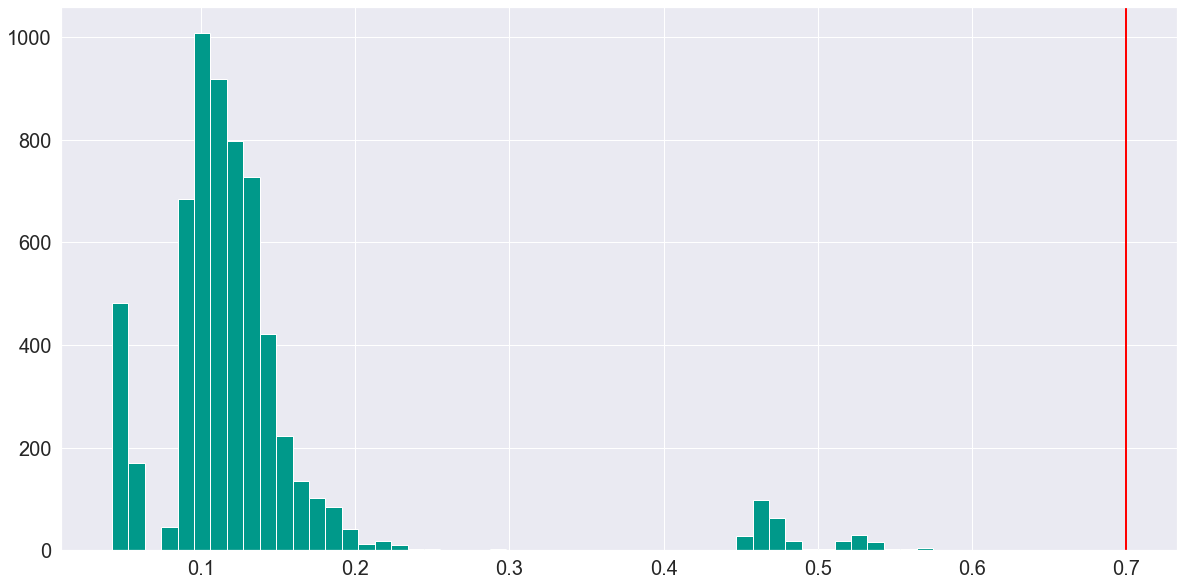

Histogram for returns for model: GaussianNB for 6179 samples
Amount of samples above 0.7 probability: 735
Amount of samples below 0.7 probability: 5444
Quality: 0.11895128661595727


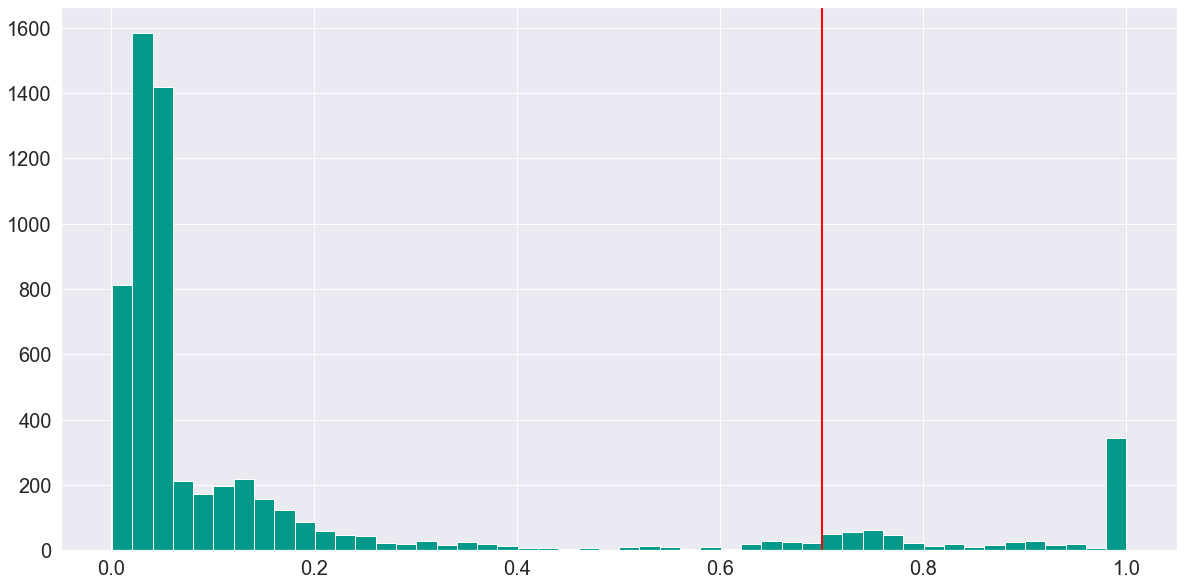

Histogram for returns for model: DecisionTreeClassifier for 6179 samples
Amount of samples above 0.7 probability: 728
Amount of samples below 0.7 probability: 5451
Quality: 0.11781841721961482


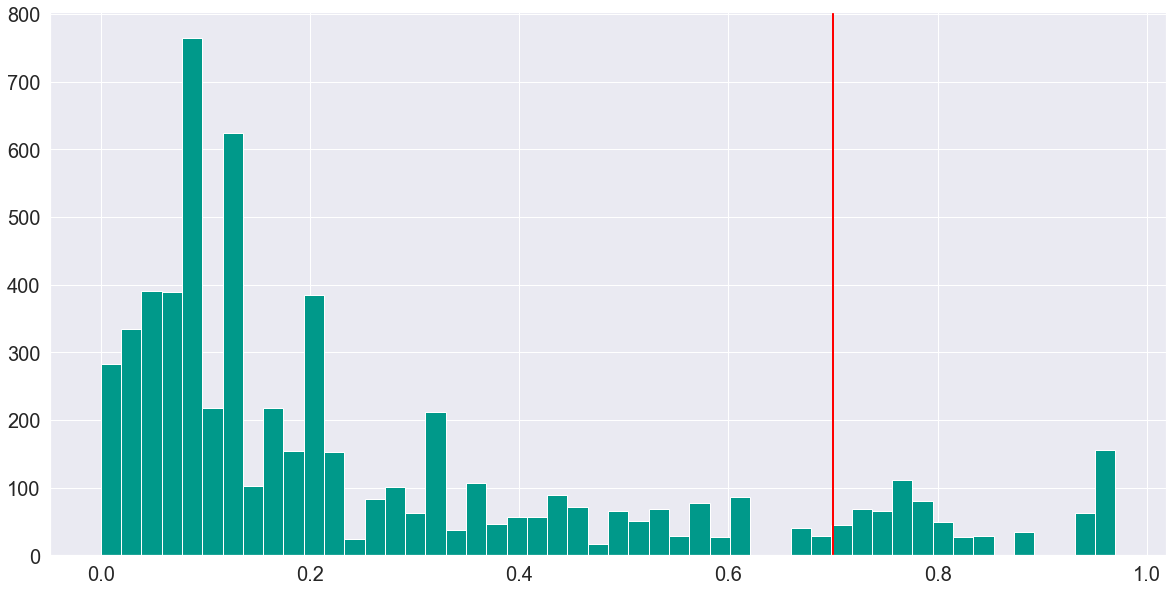

Histogram for returns for model: RandomForestClassifier for 6179 samples
Amount of samples above 0.7 probability: 54
Amount of samples below 0.7 probability: 6125
Quality: 0.008739278200356044


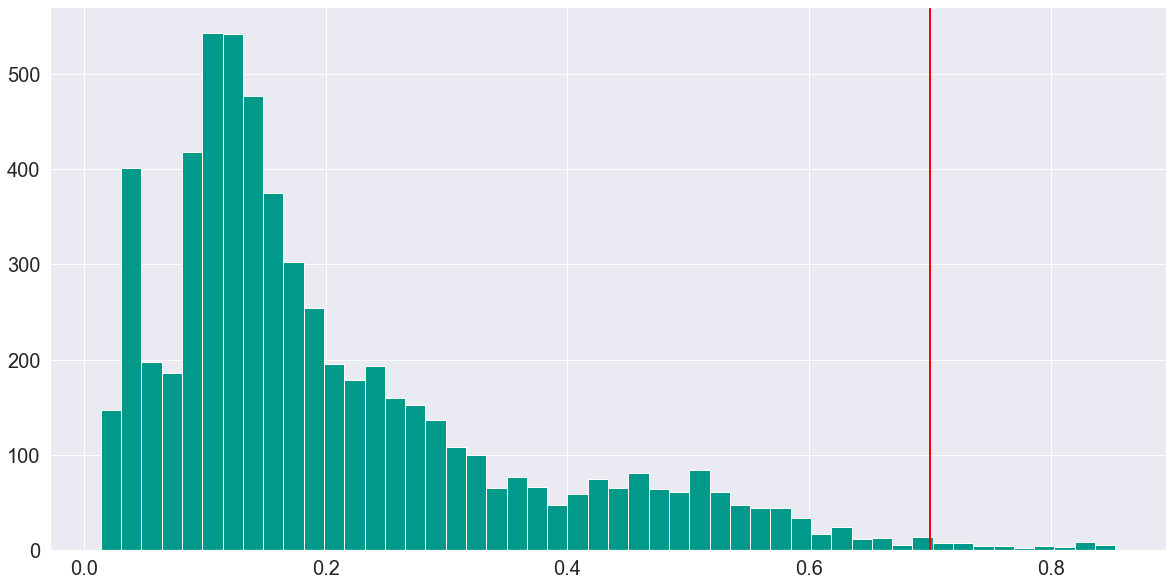

Histogram for returns for model: KNeighborsClassifier for 6179 samples
Amount of samples above 0.7 probability: 4
Amount of samples below 0.7 probability: 6175
Quality: 0.0006473539407671144


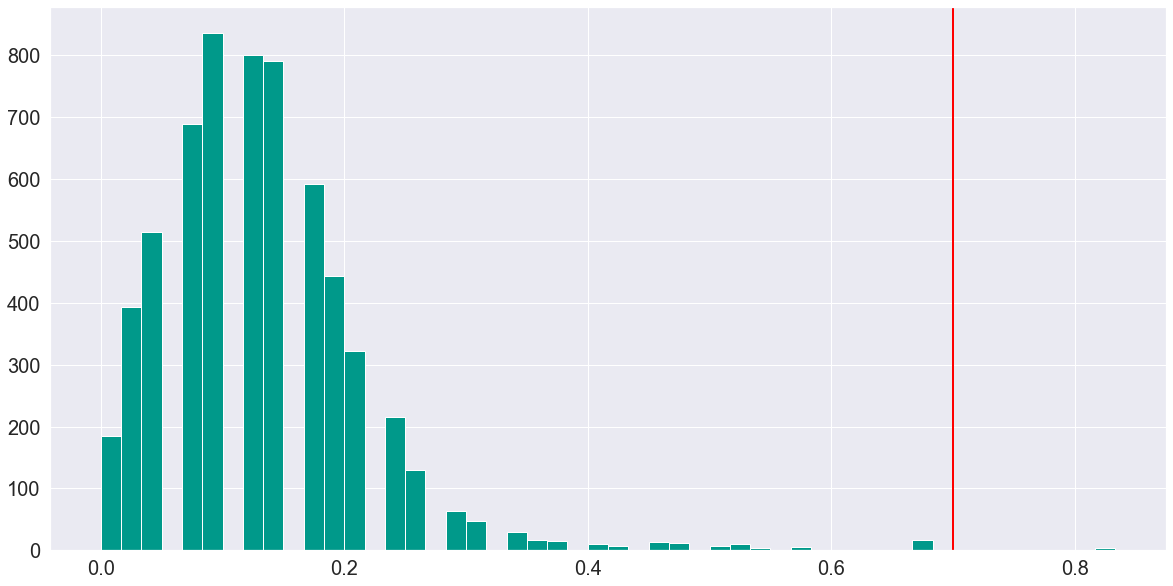

Histogram for returns for model: SVC for 6179 samples
Amount of samples above 0.7 probability: 0
Amount of samples below 0.7 probability: 6179
Quality: 0.0


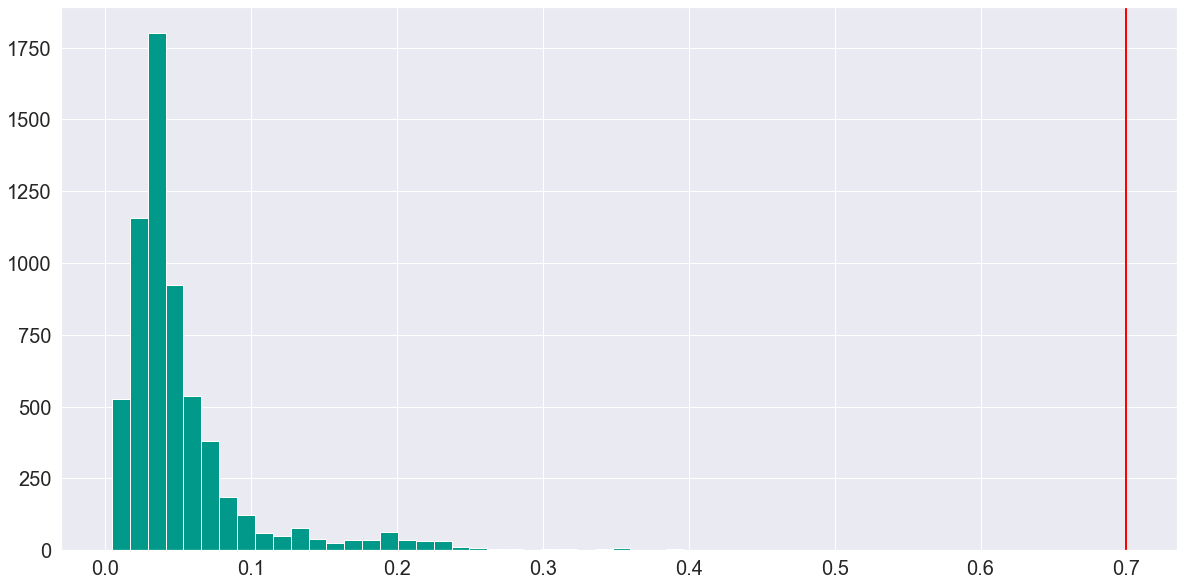

In [36]:
sampling = False
n_max = 10_000
refunds_only = False
models = [clf_tuned_logreg, clf_tuned_gnb, clf_tuned_tree, clf_tuned_forest, clf_tuned_knn, clf_tuned_svm]
export = False
Verkauf = False
df = pd.merge(X_all_test, y_all_test, left_index=True, right_index=True)

if Verkauf:
    df = df[df["Erstattungstyp"] == "Verkauf"]
    if sampling:
        df = df.sample(n=n_max)
else:
    df = df[df["Erstattungstyp"] == "Erstattung"]
    if sampling:
        df = df.sample(n=n_max)

for model in models:
    current_df = df.copy()
    current_df = current_df.reset_index(drop=True)
    for i in range(0, len(current_df)):
        rowIndex = current_df.index[i]
        current_df.loc[rowIndex, "Erstattungswahrscheinlichkeit"] = predictProbabilityFromOneSampleOfOriginalDataframe(model, current_df, rowIndex, write_to_file=True)
    if Verkauf:
        print("Histogram for sales for model: " + str(model.__class__.__name__) + " for " + str(len(df)) + " samples")
        print("Amount of samples above 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7])))
        print("Amount of samples below 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] < 0.7])))
        print("Quality: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7]) / len(current_df)))
        createHistogram(current_df[current_df["Erstattungstyp"] == "Verkauf"], "Erstattungswahrscheinlichkeit", 50, 20, 20, "Histogram of Erstattungswahrscheinlichkeit", "Histogram_Erstattungswahrscheinlichkeit.png")
        plt.show()
    else:
        print("Histogram for returns for model: " + str(model.__class__.__name__) + " for " + str(len(df)) + " samples")
        print("Amount of samples above 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7])))
        print("Amount of samples below 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] < 0.7])))
        print("Quality: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7]) / len(current_df)))
        createHistogram(current_df[current_df["Erstattungstyp"] == "Erstattung"], "Erstattungswahrscheinlichkeit", 50, 20, 20, "Histogram of Erstattungswahrscheinlichkeit", "Histogram_Erstattungswahrscheinlichkeit.png")
        plt.show()


Histogram for sales for model: LogisticRegression for 52203 samples
Amount of samples above 0.7 probability: 1
Amount of samples below 0.7 probability: 52202
Quality: 1.9155987203800547e-05


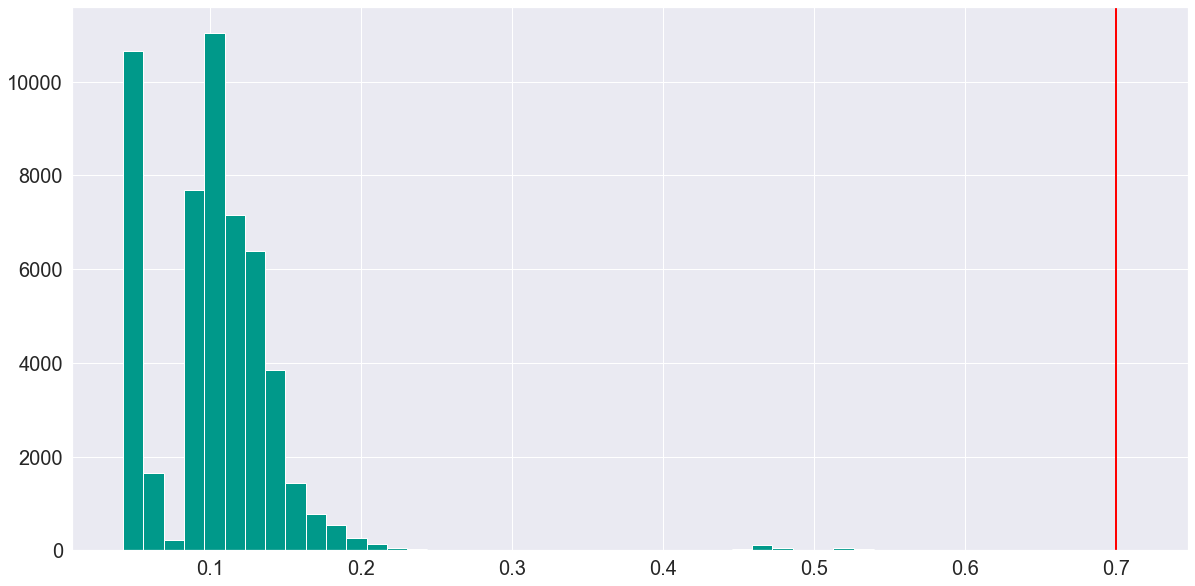

Histogram for sales for model: GaussianNB for 52203 samples
Amount of samples above 0.7 probability: 2632
Amount of samples below 0.7 probability: 49571
Quality: 0.05041855832040304


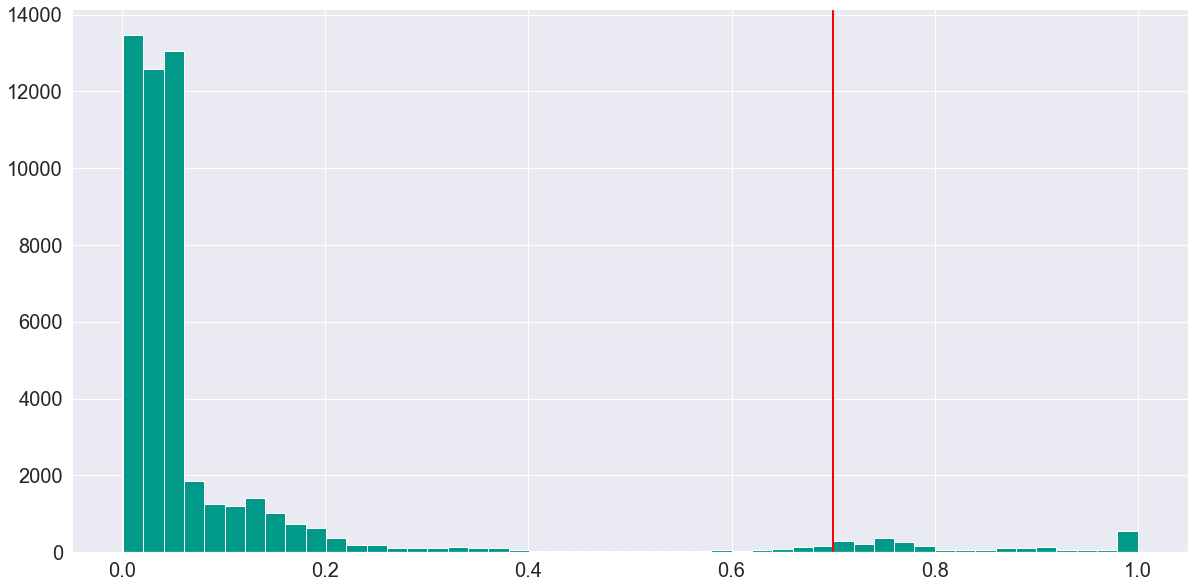

Histogram for sales for model: DecisionTreeClassifier for 52203 samples
Amount of samples above 0.7 probability: 163
Amount of samples below 0.7 probability: 52040
Quality: 0.0031224259142194895


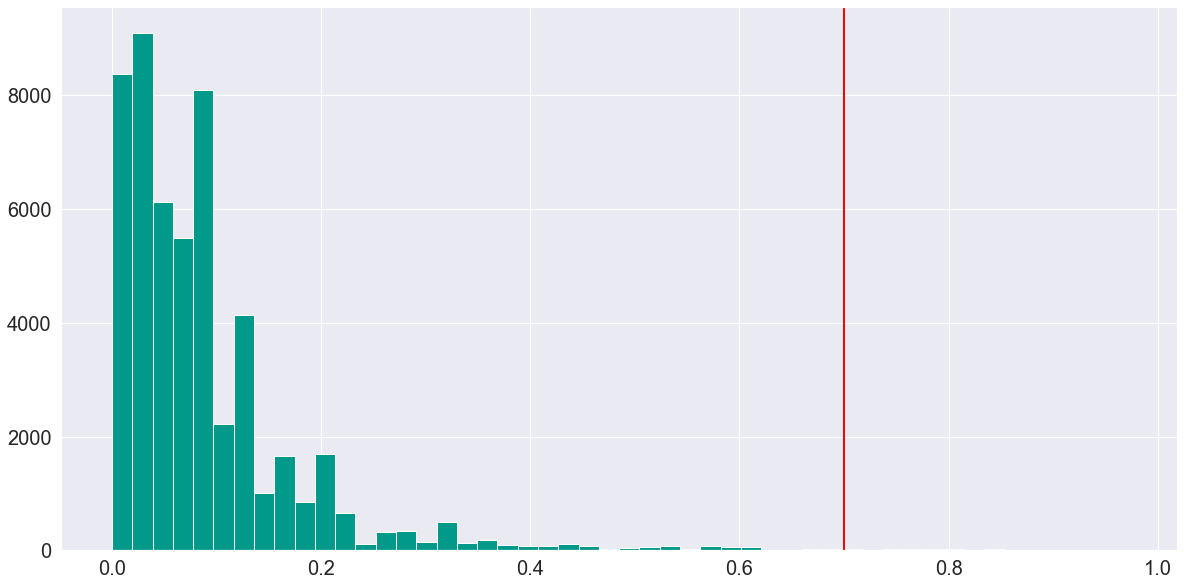

Histogram for sales for model: RandomForestClassifier for 52203 samples
Amount of samples above 0.7 probability: 4
Amount of samples below 0.7 probability: 52199
Quality: 7.662394881520219e-05


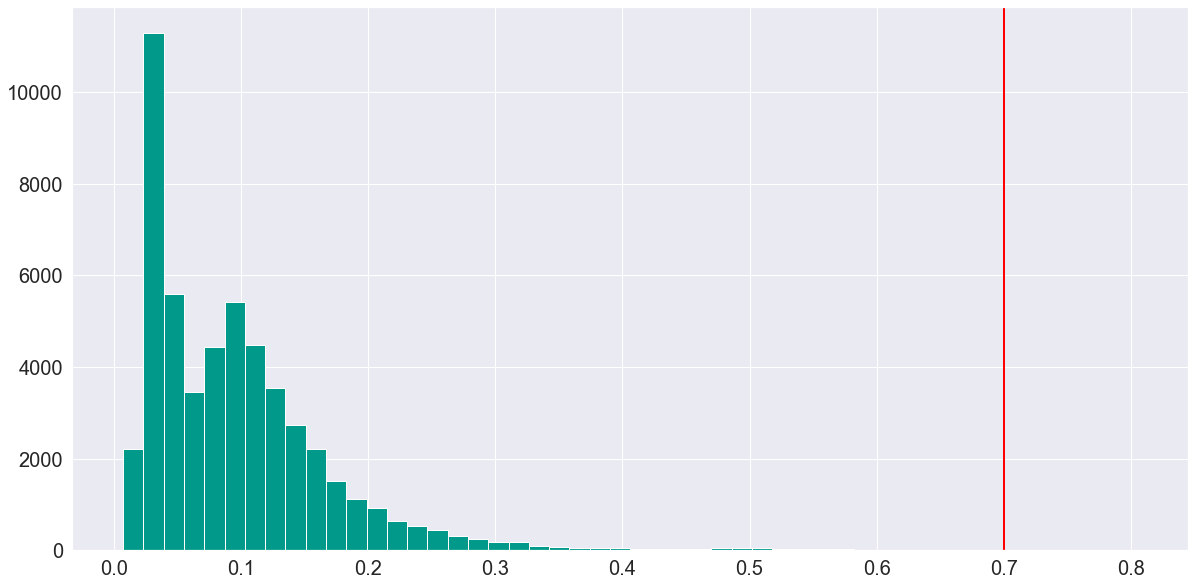

Histogram for sales for model: KNeighborsClassifier for 52203 samples
Amount of samples above 0.7 probability: 2
Amount of samples below 0.7 probability: 52201
Quality: 3.8311974407601095e-05


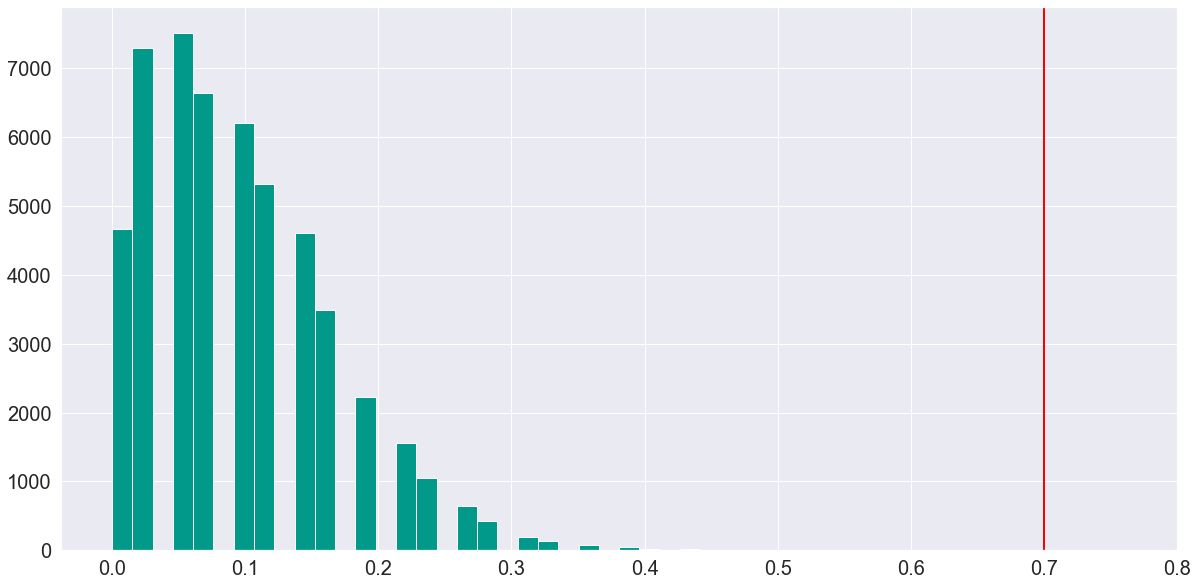

Histogram for sales for model: SVC for 52203 samples
Amount of samples above 0.7 probability: 0
Amount of samples below 0.7 probability: 52203
Quality: 0.0


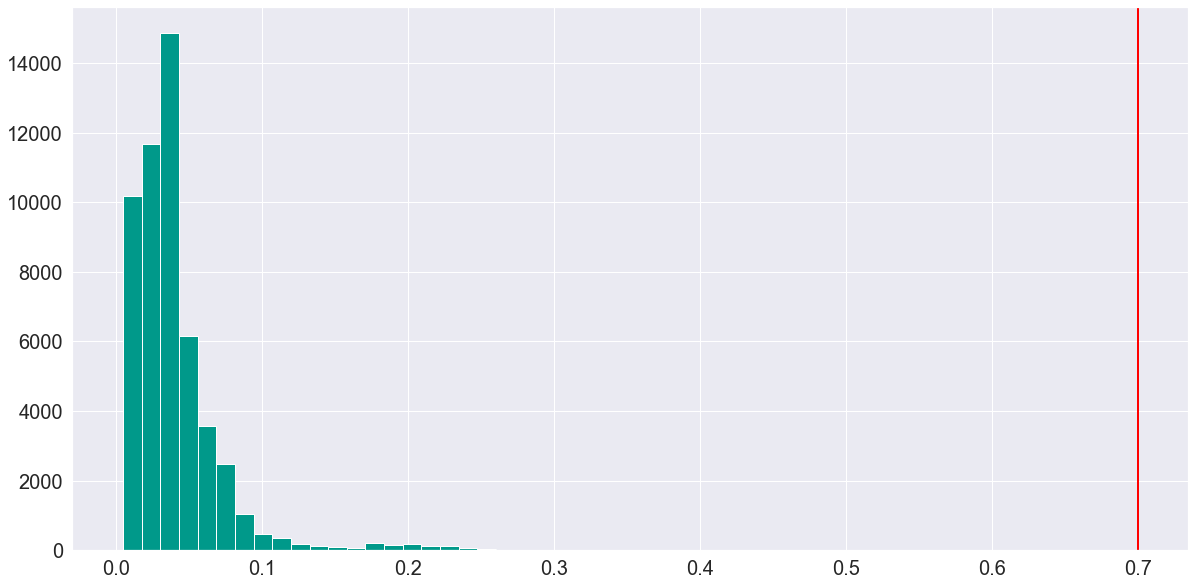

In [35]:
sampling = False
n_max = 10_000
refunds_only = False
models = [clf_tuned_logreg, clf_tuned_gnb, clf_tuned_tree, clf_tuned_forest, clf_tuned_knn, clf_tuned_svm]
export = False
Verkauf = True
df = pd.merge(X_all_test, y_all_test, left_index=True, right_index=True)

if Verkauf:
    df = df[df["Erstattungstyp"] == "Verkauf"]
    if sampling:
        df = df.sample(n=n_max)
else:
    df = df[df["Erstattungstyp"] == "Erstattung"]
    if sampling:
        df = df.sample(n=n_max)

for model in models:
    current_df = df.copy()
    current_df = current_df.reset_index(drop=True)
    for i in range(0, len(current_df)):
        rowIndex = current_df.index[i]
        current_df.loc[rowIndex, "Erstattungswahrscheinlichkeit"] = predictProbabilityFromOneSampleOfOriginalDataframe(model, current_df, rowIndex, write_to_file=True)
    if Verkauf:
        print("Histogram for sales for model: " + str(model.__class__.__name__) + " for " + str(len(df)) + " samples")
        print("Amount of samples above 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7])))
        print("Amount of samples below 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] < 0.7])))
        print("Quality: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7]) / len(current_df)))
        createHistogram(current_df[current_df["Erstattungstyp"] == "Verkauf"], "Erstattungswahrscheinlichkeit", 50, 20, 20, "Histogram of Erstattungswahrscheinlichkeit", "Histogram_Erstattungswahrscheinlichkeit.png")
        plt.show()
    else:
        print("Histogram for returns for model: " + str(model.__class__.__name__) + " for " + str(len(df)) + " samples")
        print("Amount of samples above 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7])))
        print("Amount of samples below 0.7 probability: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] < 0.7])))
        print("Quality: " + str(len(current_df[current_df["Erstattungswahrscheinlichkeit"] > 0.7]) / len(current_df)))
        createHistogram(current_df[current_df["Erstattungstyp"] == "Erstattung"], "Erstattungswahrscheinlichkeit", 50, 20, 20, "Histogram of Erstattungswahrscheinlichkeit", "Histogram_Erstattungswahrscheinlichkeit.png")
        plt.show()
